In [34]:
%matplotlib inline


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import plotly.graph_objects as go

G = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']

In [7]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


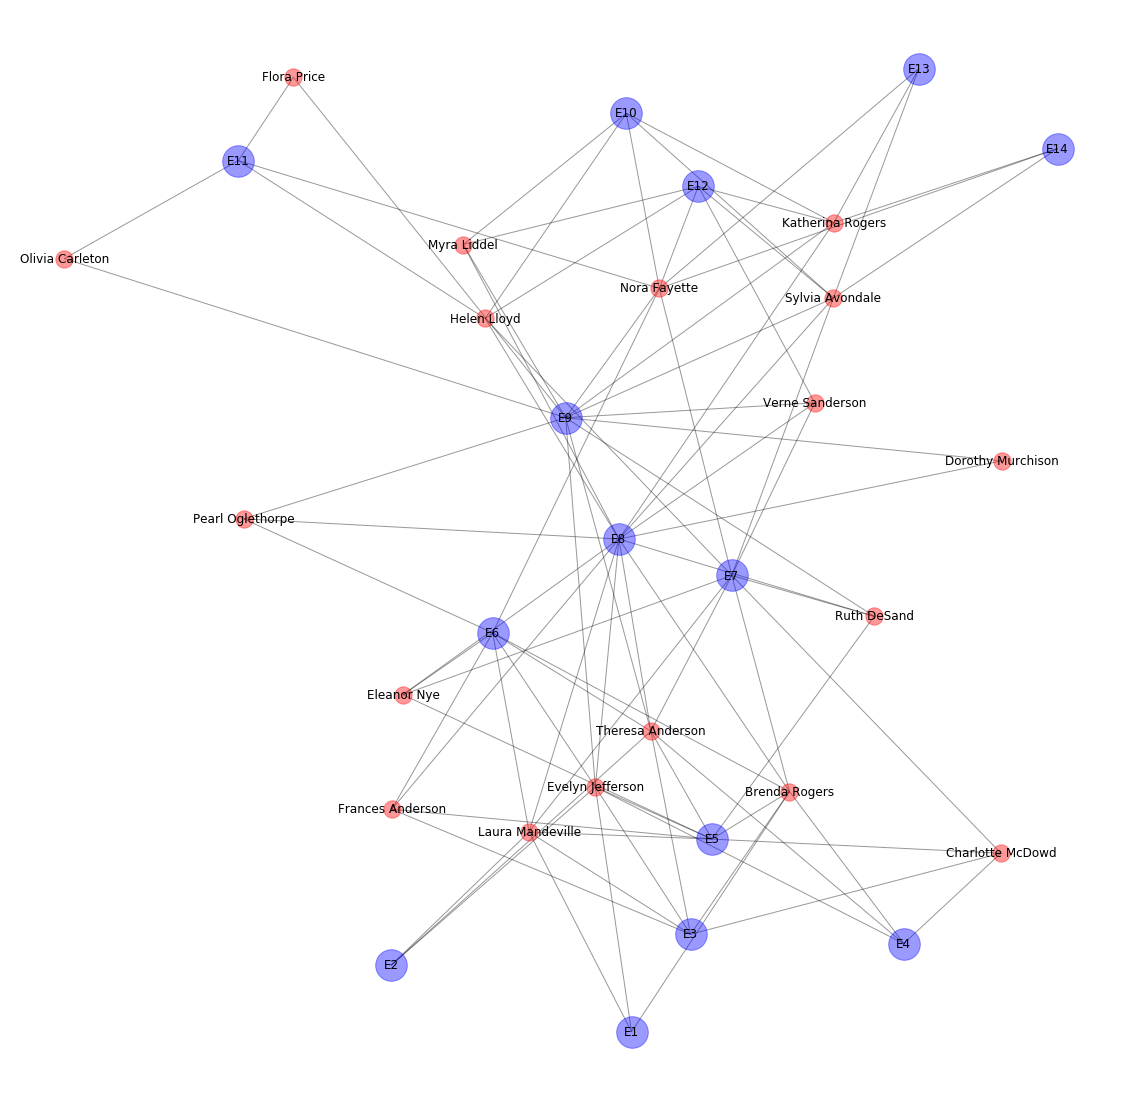

In [17]:
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (20,20)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='red', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='blue', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

In [9]:
print('radius =', nx.radius(G))

#Of our connected subgraph, the radius, or the minimum eccentricity, runs the distance from each node to all other nodes, and then returns the minimum measure of that. In other words, of all the nodes, what is the shortest distance between a node and all other nodes.

radius = 3


In [10]:
print('center =', nx.center(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']


In [12]:
from operator import itemgetter as ig

def sorted_map(map):
    ms = sorted(map.items(), key=ig(1), reverse=True)
    return ms

In [13]:
d=dict(G.degree())
ds=sorted_map(d)
ds[:10]

#Degrees capture the number of times a node appears in the dataset. I am reviewing the top 10.

[('E8', 14),
 ('E9', 12),
 ('E7', 10),
 ('Evelyn Jefferson', 8),
 ('Theresa Anderson', 8),
 ('Nora Fayette', 8),
 ('E5', 8),
 ('E6', 8),
 ('Laura Mandeville', 7),
 ('Brenda Rogers', 7)]

In [14]:
c=nx.closeness_centrality(G)
cs=sorted_map(c)
cs[:10]

#Closeness centrality measures a node's ability to communicate with others. I am reviewing the top 10.

[('E8', 0.5961538461538461),
 ('E9', 0.5535714285714286),
 ('Evelyn Jefferson', 0.5166666666666667),
 ('Theresa Anderson', 0.5166666666666667),
 ('Nora Fayette', 0.5166666666666667),
 ('E7', 0.5166666666666667),
 ('Sylvia Avondale', 0.5),
 ('E6', 0.484375),
 ('Laura Mandeville', 0.4696969696969697),
 ('Brenda Rogers', 0.4696969696969697)]

In [15]:
b=nx.betweenness_centrality(G)
bs=sorted_map(b)
bs[:10]

#Betweenness centrality is based on the idea that power resides in bottlenecks between networks.  I am reviewing the top 10.

[('E8', 0.23700300426238308),
 ('E9', 0.21920891071174742),
 ('E7', 0.1258812653738273),
 ('Nora Fayette', 0.10858130346049079),
 ('Evelyn Jefferson', 0.09243053952845212),
 ('Theresa Anderson', 0.08382717212549207),
 ('Sylvia Avondale', 0.06862488078028632),
 ('E6', 0.06319868906402719),
 ('Laura Mandeville', 0.04914868366576943),
 ('Brenda Rogers', 0.04735814390994237)]

In [16]:
e=nx.eigenvector_centrality_numpy(G)
es=sorted_map(e)
es[:10]

#Eigenvector measurements is a metric that captures degree centrality. I am reviewing the top 10.

[('E8', 0.3582434255702717),
 ('E7', 0.27117752361709463),
 ('E9', 0.2683416473342365),
 ('Theresa Anderson', 0.2620280240263059),
 ('Evelyn Jefferson', 0.23669267731257312),
 ('E6', 0.23166176492584473),
 ('E5', 0.22750001987427024),
 ('Brenda Rogers', 0.22133062454695634),
 ('Laura Mandeville', 0.21865489556710915),
 ('Sylvia Avondale', 0.19599205826099056)]

Let us focus on individuals as I believe they are what impacts events. The graph below focuses on weighted edges and the darker the color of an edge the stronger it is between nodes. We can note there seems to be cliques between, Evelyn, Theresa, Brenda and Laura, and; Nora, Sylvia and Katherina. Let us look into it further.

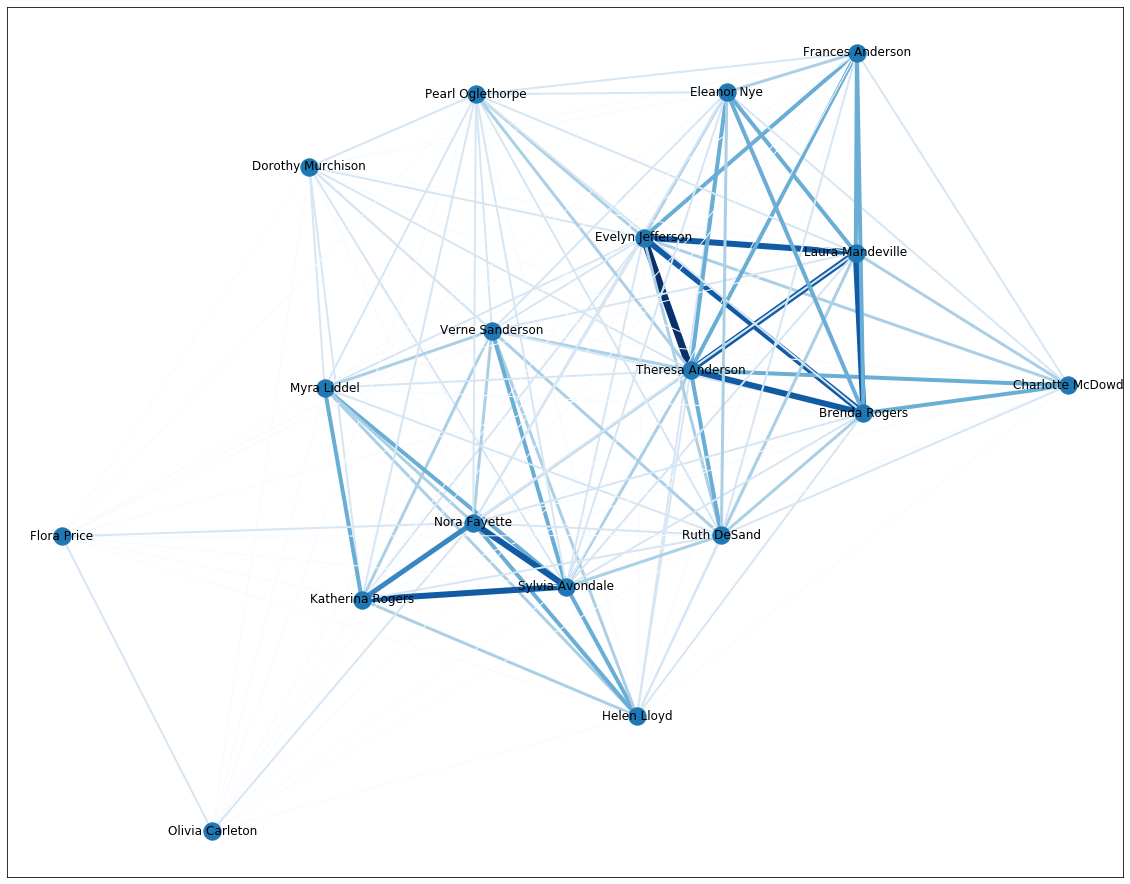

In [30]:
individuals = bipartite.weighted_projected_graph(G, women, ratio=False)
weights = [edata['weight'] for f, t, edata in individuals.edges(data=True)]
plt.figure(figsize=(20,16))
nx.draw_networkx(individuals, width=weights, edge_color=weights, edge_cmap=plt.cm.Blues)

In [31]:
sorted(individuals.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20]

[('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7}),
 ('Evelyn Jefferson', 'Laura Mandeville', {'weight': 6}),
 ('Evelyn Jefferson', 'Brenda Rogers', {'weight': 6}),
 ('Theresa Anderson', 'Laura Mandeville', {'weight': 6}),
 ('Theresa Anderson', 'Brenda Rogers', {'weight': 6}),
 ('Laura Mandeville', 'Brenda Rogers', {'weight': 6}),
 ('Sylvia Avondale', 'Katherina Rogers', {'weight': 6}),
 ('Sylvia Avondale', 'Nora Fayette', {'weight': 6}),
 ('Katherina Rogers', 'Nora Fayette', {'weight': 5}),
 ('Helen Lloyd', 'Sylvia Avondale', {'weight': 4}),
 ('Helen Lloyd', 'Nora Fayette', {'weight': 4}),
 ('Evelyn Jefferson', 'Frances Anderson', {'weight': 4}),
 ('Verne Sanderson', 'Sylvia Avondale', {'weight': 4}),
 ('Charlotte McDowd', 'Theresa Anderson', {'weight': 4}),
 ('Charlotte McDowd', 'Brenda Rogers', {'weight': 4}),
 ('Theresa Anderson', 'Ruth DeSand', {'weight': 4}),
 ('Theresa Anderson', 'Frances Anderson', {'weight': 4}),
 ('Theresa Anderson', 'Eleanor Nye', {'weight': 4}),
 ('My

Here we can quickly see the two cliques which exists and which individuals are part of each cliques. Let us verify if that is in fact true.

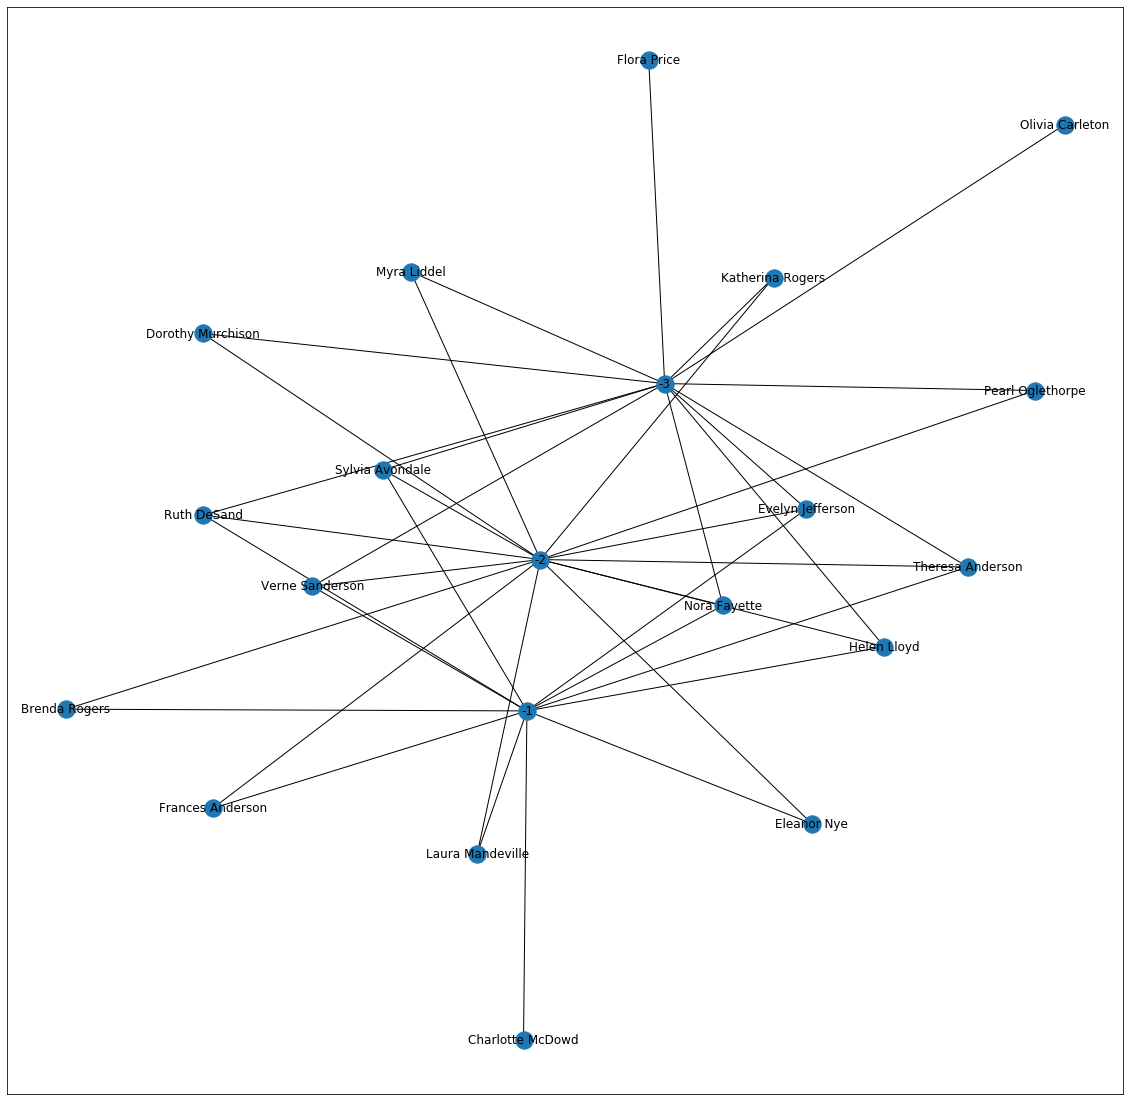

In [43]:
cliques = nx.make_clique_bipartite(individuals, fpos=None, create_using=None, name=None)
nx.draw_networkx(cliques)

In the returned bipartite graph, the “numerical” nodes represent the cliques of G. We can see that there are actually 3 different cliques. I would developed this graph for a future project to determine which one of these cliques would be weighted heavier based on the individuals in it. However, based on the earlier analysis, I believe the Evelyn, Theresa, Brenda and Laura clique is the strongest.